In [1]:
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D
import numpy as np

In [ ]:
df_1 = pd.read_csv("simulación_source_z_valores_altos.csv")
df_1 = df_1.drop('Unnamed: 0', axis=1)

df_2 = pd.read_csv("simulación_source_z_valores_bajos.csv")
df_2 = df_2.drop('Unnamed: 0', axis=1)

df = pd.concat([df_1, df_2], axis=0) 

df

,sim_name,method,expected_theta,theta_prom,error,est_theta_list,mic_array.d,mic_array.position,source.position,mic-source distance
0,"sim_anechoic_d0.1_s[0.0,0.0,0.0]_m[10.2,0.0,5.0]",Classic,154.323,164.370,0.00312,"[0.0, 180.0, 158.27, 154.84]",0.1,"[10.2, 0, 5]","[0.0, 0.0, 0.0]",11.539497
1,"sim_anechoic_d0.1_s[0.0,0.0,0.0]_m[10.2,0.0,5.0]",ROTH,154.323,164.370,0.00312,"[0.0, 180.0, 158.27, 154.84]",0.1,"[10.2, 0, 5]","[0.0, 0.0, 0.0]",11.539497
2,"sim_anechoic_d0.1_s[0.0,0.0,0.0]_m[10.2,0.0,5.0]",PHAT,154.323,164.370,0.00312,"[0.0, 180.0, 158.27, 154.84]",0.1,"[10.2, 0, 5]","[0.0, 0.0, 0.0]",11.539497
3,"sim_anechoic_d0.1_s[0.0,0.0,0.0]_m[10.2,0.0,5.0]",SCOT,154.323,164.370,0.00312,"[0.0, 180.0, 158.27, 154.84]",0.1,"[10.2, 0, 5]","[0.0, 0.0, 0.0]",11.539497
4,"sim_anechoic_d0.1_s[0.0,0.0,0.0]_m[10.2,0.0,5.0]",ECKART,154.323,165.513,0.00386,"[0.0, 180.0, 158.27, 158.27]",0.1,"[10.2, 0, 5]","[0.0, 0.0, 0.0]",11.539497
...,...,...,...,...,...,...,...,...,...,...
1315,"sim_anechoic_d0.1_s[15.0,12.0,10.0]_m[10.2,10....",ROTH,49.190,51.690,0.00019,"[0.0, 55.13, 49.97, 49.97]",0.1,"[10.15, 10, 5]","[15, 12, 10.0]",7.114949
1316,"sim_anechoic_d0.1_s[15.0,12.0,10.0]_m[10.2,10....",PHAT,49.190,51.690,0.00019,"[0.0, 55.13, 49.97, 49.97]",0.1,"[10.15, 10, 5]","[15, 12, 10.0]",7.114949
1317,"sim_anechoic_d0.1_s[15.0,12.0,10.0]_m[10.2,10....",SCOT,49.190,51.690,0.00019,"[0.0, 55.13, 49.97, 49.97]",0.1,"[10.15, 10, 5]","[15, 12, 10.0]",7.114949
1318,"sim_anechoic_d0.1_s[15.0,12.0,10.0]_m[10.2,10....",ECKART,49.190,51.690,0.00019,"[0.0, 55.13, 49.97, 49.97]",0.1,"[10.15, 10, 5]","[15, 12, 10.0]",7.114949


In [100]:
source_position = df["source.position"]
m_s_distance = df["mic-source distance"]
source_pos_list = list(source_position.values)

In [101]:

def get_position(pos_list, axis=False):
    final_pos = []
    for pos in pos_list:
        new_pos = pos.strip()
        new_pos = new_pos.replace("[", "")
        new_pos = new_pos.replace("]", "")
        x, y, z = new_pos.split(",")
        x = np.round(float(x), 2)
        y = np.round(float(y), 2)
        z = np.round(float(z), 2)
        if not axis:
            final_pos.append([x, y, z])
        if axis == "x":
            final_pos.append(x)
        elif axis == "y":
            final_pos.append(y)
        elif axis == "z":
            final_pos.append(z)
        else:
            ValueError("Not possible axis")
    return final_pos


In [102]:
z_pos = get_position(source_pos_list, axis="z")

df["source_z"] = z_pos
df

,sim_name,method,expected_theta,theta_prom,error,est_theta_list,mic_array.d,mic_array.position,source.position,mic-source distance,source_z
0,"sim_anechoic_d0.1_s[0.0,0.0,0.0]_m[10.2,0.0,5.0]",Classic,154.323,164.370,0.00312,"[0.0, 180.0, 158.27, 154.84]",0.1,"[10.2, 0, 5]","[0.0, 0.0, 0.0]",11.539497,0.0
1,"sim_anechoic_d0.1_s[0.0,0.0,0.0]_m[10.2,0.0,5.0]",ROTH,154.323,164.370,0.00312,"[0.0, 180.0, 158.27, 154.84]",0.1,"[10.2, 0, 5]","[0.0, 0.0, 0.0]",11.539497,0.0
2,"sim_anechoic_d0.1_s[0.0,0.0,0.0]_m[10.2,0.0,5.0]",PHAT,154.323,164.370,0.00312,"[0.0, 180.0, 158.27, 154.84]",0.1,"[10.2, 0, 5]","[0.0, 0.0, 0.0]",11.539497,0.0
3,"sim_anechoic_d0.1_s[0.0,0.0,0.0]_m[10.2,0.0,5.0]",SCOT,154.323,164.370,0.00312,"[0.0, 180.0, 158.27, 154.84]",0.1,"[10.2, 0, 5]","[0.0, 0.0, 0.0]",11.539497,0.0
4,"sim_anechoic_d0.1_s[0.0,0.0,0.0]_m[10.2,0.0,5.0]",ECKART,154.323,165.513,0.00386,"[0.0, 180.0, 158.27, 158.27]",0.1,"[10.2, 0, 5]","[0.0, 0.0, 0.0]",11.539497,0.0
...,...,...,...,...,...,...,...,...,...,...,...
1315,"sim_anechoic_d0.1_s[15.0,12.0,10.0]_m[10.2,10....",ROTH,49.190,51.690,0.00019,"[0.0, 55.13, 49.97, 49.97]",0.1,"[10.15, 10, 5]","[15, 12, 10.0]",7.114949,10.0
1316,"sim_anechoic_d0.1_s[15.0,12.0,10.0]_m[10.2,10....",PHAT,49.190,51.690,0.00019,"[0.0, 55.13, 49.97, 49.97]",0.1,"[10.15, 10, 5]","[15, 12, 10.0]",7.114949,10.0
1317,"sim_anechoic_d0.1_s[15.0,12.0,10.0]_m[10.2,10....",SCOT,49.190,51.690,0.00019,"[0.0, 55.13, 49.97, 49.97]",0.1,"[10.15, 10, 5]","[15, 12, 10.0]",7.114949,10.0
1318,"sim_anechoic_d0.1_s[15.0,12.0,10.0]_m[10.2,10....",ECKART,49.190,51.690,0.00019,"[0.0, 55.13, 49.97, 49.97]",0.1,"[10.15, 10, 5]","[15, 12, 10.0]",7.114949,10.0


In [103]:
distance = df["mic-source distance"]
distance = np.round(distance.values, 2)
distance

array([11.54, 11.54, 11.54, ...,  7.11,  7.11,  7.11])

In [104]:
mic_pos = [10, 0, 5]
z_ang = []
for i in range(len(z_pos)):
    diff_z = np.absolute(z_pos[i] - mic_pos[2])
    phi = np.arccos(diff_z/distance[i])
    phi_ang = np.round(np.rad2deg(phi),0)
    z_ang.append(phi_ang)
print(z_ang)

[64.0, 64.0, 64.0, 64.0, 64.0, 64.0, 67.0, 67.0, 67.0, 67.0, 67.0, 67.0, 69.0, 69.0, 69.0, 69.0, 69.0, 69.0, 72.0, 72.0, 72.0, 72.0, 72.0, 72.0, 74.0, 74.0, 74.0, 74.0, 74.0, 74.0, 77.0, 77.0, 77.0, 77.0, 77.0, 77.0, 80.0, 80.0, 80.0, 80.0, 80.0, 80.0, 83.0, 83.0, 83.0, 83.0, 83.0, 83.0, 86.0, 86.0, 86.0, 86.0, 86.0, 86.0, 89.0, 89.0, 89.0, 89.0, 89.0, 89.0, 89.0, 89.0, 89.0, 89.0, 89.0, 89.0, 86.0, 86.0, 86.0, 86.0, 86.0, 86.0, 83.0, 83.0, 83.0, 83.0, 83.0, 83.0, 80.0, 80.0, 80.0, 80.0, 80.0, 80.0, 77.0, 77.0, 77.0, 77.0, 77.0, 77.0, 74.0, 74.0, 74.0, 74.0, 74.0, 74.0, 72.0, 72.0, 72.0, 72.0, 72.0, 72.0, 69.0, 69.0, 69.0, 69.0, 69.0, 69.0, 67.0, 67.0, 67.0, 67.0, 67.0, 67.0, 64.0, 64.0, 64.0, 64.0, 64.0, 64.0, 65.0, 65.0, 65.0, 65.0, 65.0, 65.0, 67.0, 67.0, 67.0, 67.0, 67.0, 67.0, 70.0, 70.0, 70.0, 70.0, 70.0, 70.0, 72.0, 72.0, 72.0, 72.0, 72.0, 72.0, 75.0, 75.0, 75.0, 75.0, 75.0, 75.0, 77.0, 77.0, 77.0, 77.0, 77.0, 77.0, 80.0, 80.0, 80.0, 80.0, 80.0, 80.0, 83.0, 83.0, 83.0, 83.0, 83.

In [105]:
df["z angle"] = z_ang

In [112]:
def angle_range(angles):
    ang_list = []
    for ang in angles:
        if ang >= 0 and ang <= 30:
            ang_list.append(1)
        elif ang > 30 and ang<= 60:
            ang_list.append(2)
        elif ang > 60 and ang <= 90:
            ang_list.append(3)
        elif ang >90 and ang <= 180:
            ang_list.append(4)
        else:
            ValueError(f'Todo esto está cursed')
    return ang_list

angle_ranges = angle_range(z_ang)
df["angle ranges"] = angle_ranges

In [113]:
df

,sim_name,method,expected_theta,theta_prom,error,est_theta_list,mic_array.d,mic_array.position,source.position,mic-source distance,source_z,z angle,angle ranges
0,"sim_anechoic_d0.1_s[0.0,0.0,0.0]_m[10.2,0.0,5.0]",Classic,154.323,164.370,0.00312,"[0.0, 180.0, 158.27, 154.84]",0.1,"[10.2, 0, 5]","[0.0, 0.0, 0.0]",11.539497,0.0,64.0,3
1,"sim_anechoic_d0.1_s[0.0,0.0,0.0]_m[10.2,0.0,5.0]",ROTH,154.323,164.370,0.00312,"[0.0, 180.0, 158.27, 154.84]",0.1,"[10.2, 0, 5]","[0.0, 0.0, 0.0]",11.539497,0.0,64.0,3
2,"sim_anechoic_d0.1_s[0.0,0.0,0.0]_m[10.2,0.0,5.0]",PHAT,154.323,164.370,0.00312,"[0.0, 180.0, 158.27, 154.84]",0.1,"[10.2, 0, 5]","[0.0, 0.0, 0.0]",11.539497,0.0,64.0,3
3,"sim_anechoic_d0.1_s[0.0,0.0,0.0]_m[10.2,0.0,5.0]",SCOT,154.323,164.370,0.00312,"[0.0, 180.0, 158.27, 154.84]",0.1,"[10.2, 0, 5]","[0.0, 0.0, 0.0]",11.539497,0.0,64.0,3
4,"sim_anechoic_d0.1_s[0.0,0.0,0.0]_m[10.2,0.0,5.0]",ECKART,154.323,165.513,0.00386,"[0.0, 180.0, 158.27, 158.27]",0.1,"[10.2, 0, 5]","[0.0, 0.0, 0.0]",11.539497,0.0,64.0,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1315,"sim_anechoic_d0.1_s[15.0,12.0,10.0]_m[10.2,10....",ROTH,49.190,51.690,0.00019,"[0.0, 55.13, 49.97, 49.97]",0.1,"[10.15, 10, 5]","[15, 12, 10.0]",7.114949,10.0,45.0,2
1316,"sim_anechoic_d0.1_s[15.0,12.0,10.0]_m[10.2,10....",PHAT,49.190,51.690,0.00019,"[0.0, 55.13, 49.97, 49.97]",0.1,"[10.15, 10, 5]","[15, 12, 10.0]",7.114949,10.0,45.0,2
1317,"sim_anechoic_d0.1_s[15.0,12.0,10.0]_m[10.2,10....",SCOT,49.190,51.690,0.00019,"[0.0, 55.13, 49.97, 49.97]",0.1,"[10.15, 10, 5]","[15, 12, 10.0]",7.114949,10.0,45.0,2
1318,"sim_anechoic_d0.1_s[15.0,12.0,10.0]_m[10.2,10....",ECKART,49.190,51.690,0.00019,"[0.0, 55.13, 49.97, 49.97]",0.1,"[10.15, 10, 5]","[15, 12, 10.0]",7.114949,10.0,45.0,2


In [ ]:
groupby[]

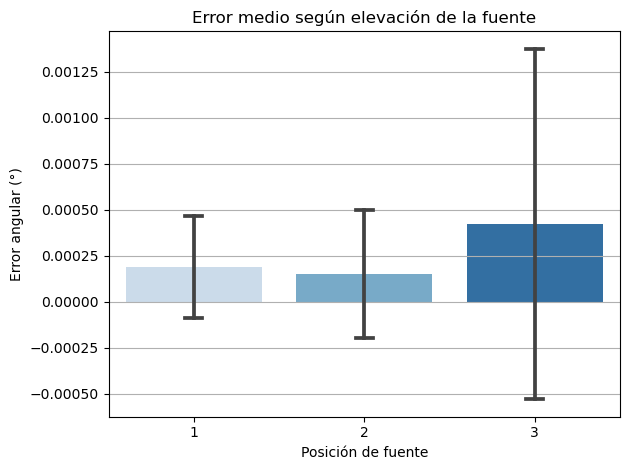

In [114]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.barplot(data=df,
    x="angle ranges",
    y="error",
    errorbar="sd",   # usa la desviación estándar como barra de error
    capsize=0.1,
    palette="Blues"
)
plt.title("Error medio según elevación de la fuente")
plt.xlabel("Posición de fuente")
plt.ylabel("Error angular (°)")
plt.grid(axis="y")
plt.tight_layout()
plt.show()

In [85]:
z_angles_error = df.groupby("z angle")["error"]

In [ ]:

def plot_error_vs_distance(df):
    """
    Grafica el error medio en función de la distancia entre micrófonos,
    separando curvas según la cantidad de micrófonos.
    """
    # Agrupar por n_mics y d_mics, y calcular la media del error
    grouped = df.groupby(["mic_array.n", "mic_array.d"])["error"].mean().reset_index()
    grouped.columns = ["n_mics", "d_mics", "error"]

    # Convertir tipos si fuera necesario
    grouped["n_mics"] = grouped["n_mics"].astype(int)
    grouped["d_mics"] = grouped["d_mics"].astype(float)

    # Graficar
    plt.figure(figsize=(10, 6))
    sns.lineplot(data=grouped, x="d_mics", y="error", hue="n_mics", marker="o", palette="viridis")

    plt.xlabel("Distancia entre micrófonos (m)")
    plt.ylabel("Error medio (°)")
    plt.title("Error medio vs distancia entre micrófonos")
    plt.grid(True)
    plt.legend(title="Cantidad de micrófonos")
    plt.tight_layout()
    plt.show()

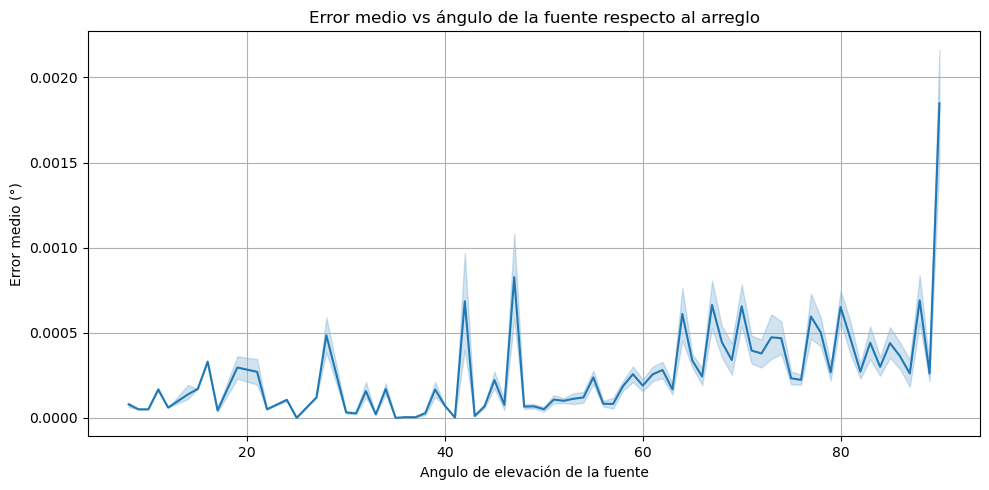

In [108]:
plt.figure(figsize=(10, 5))
sns.lineplot(data=df, x="z angle", y="error")

plt.xlabel("Angulo de elevación de la fuente")
plt.ylabel("Error medio (°)")
plt.title("Error medio vs ángulo de la fuente respecto al arreglo")
plt.grid(True)
#plt.legend(title="Cantidad de micrófonos")
plt.tight_layout()
plt.show()

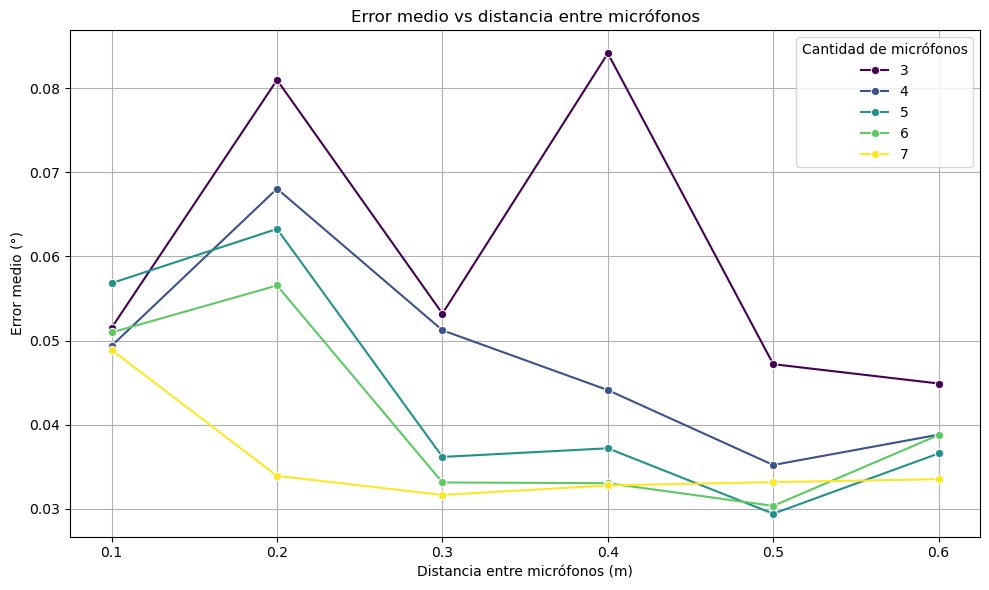

In [10]:
plot_error_vs_distance(df)